In [ ]:
# Setting up a custom stylesheet in IJulia
file = open("style.css") # A .css file in the same folder as this notebook file
styl = read(file,String) # Read the file
HTML("$styl") # Output as HTML

<h1> Simple plots with the Plots package </h1>

<h2>In this lecture</h2>

- [Outcome](#Outcome)
- [Load the Plots package into a current notebook](#Load-the-Plots-package-into-a-current-notebook)
- [Activate the GR backend for use with Plots](#Activate-the-GR-backend-for-use-with-Plots)
- [Plot a curve from coordinate data](#Plot-a-curve-from-coordinate-data)
- [Tweak the current plot](#Tweak-the-current-plot)
- [Save the current plot](#Save-the-current-plot)


[Back to the top](#In-this-lecture)

<h2>Outcome</h2>

After this lecture, you will be able to
- Explain how the Plots package relates to other plotting projects in Julia
- Load the Plots package into a current notebook and the GR backend for use with Plots
- Plot coordinate data as lines in the default style supplied by Plots
- Modify the current plot style: replace lines with markers, add title and labels, remove legend and grid lines
- Save the current plot in .png and .pdf format

[Back to the top](#In-this-lecture)

To start, we load the data that we saved last time (the *converted* data, of course), and we create the x- and y-coordinates of the points we want to plot. Those are of course just columns 1 and 2 of the data.

We use array slicing to extract the data we need---note the use of  the ``:`` operator

In [1]:
using DelimitedFiles
EVDdata = DelimitedFiles.readdlm("wikipediaEVDdatesconverted.csv", ',')  # don't forget the delimiter!
epidays = EVDdata[:, 1]  # Here ":" means all the entries in all rows of the specified columns
allcases = EVDdata[:, 2] # ditto---here, the specified columns is just column 2

54-element Vector{Any}:
 28637
 28634
 28635
 28607
 28539
 28476
 28454
 28388
 28295
 28220
     ⋮
   982
   779
   528
   309
   260
   239
   176
   130
    49

<h2>Load the Plots package into a current notebook</h2>

Julia has quite a few projects on visualising scientific and technical data, and  several of them are concerned mainly with making plots. 

We choose to offer you the Plots package, together with the GR backend.

We load Plots with a simple command. This also works from your own home installation, though  you may have to add the Plots package by issuing ``Pkg.add("Plots")``.

WARNING: sadly, one pays substantial compilation cost for Plots. This is being worked on, but for now, the first time you load Plots in a notebook, as well the first plot you make, you'll wait as much as a minute or two.

In [3]:
using Plots   # this loads the Plots package into your current workspace. It may take a few seconds.


[Back to the top](#In-this-lecture)

<h2>Activate the GR backend for use with Plots</h2>

As I said above, having loaded Plots we need to specify which backend to use. The idea of Plots is that we specify a plot with *identical code*, irrrespective of backend. To change backends is then just to run the command for the new backend.

However, not all backends do the same things, of course, so some things work better in some back-ends and other things in others. For more information, do consult the Plots homepage at https://juliaplots.github.io . The GR examples are at http://docs.juliaplots.org/latest/examples/gr/ .

Here's how to specify GR as the backend for  Plots to use:

In [4]:
gr()

Plots.GRBackend()

Note that it is enough to use ``gr()``. That is, no arguments are needed. Plots has reasonable default values it uses, but the user can override them. For example, you can  specify a picture size of your own liking.

[Back to the top](#In-this-lecture)

<h2>Plot a curve from coordinate data</h2>

For Plots to work as advertised, it must be extremely straightforward to plot the data. And it is:

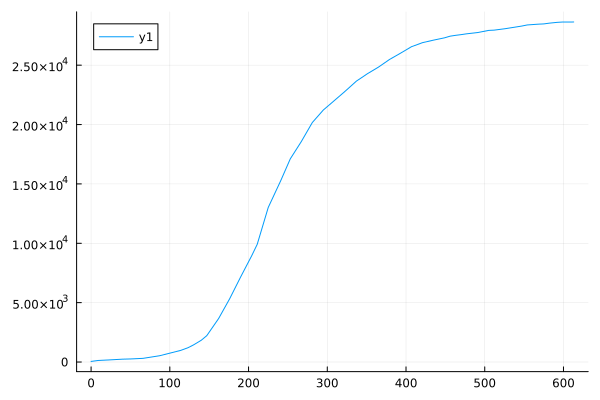

In [5]:
plot(epidays, allcases)

Hm, not too bad! Good choice of scale for the two axes. A light blue for the curve is not that readable for some people, but it looks pretty. The default is to show a legend but neither title nor axis labels.

Plots lives up to its billing---simple to use, good pictures produced.

[Back to the top](#In-this-lecture)

<h2>Tweak the current plot</h2>

We choose different attributes by specifying the values of keywords. Plots provides many ways to do this, but I'll show only a few. For more information, see the Plots homepage https://juliaplots.github.io/ .

I think the plot would be better if it used symbols for the data points. Let's also omit the line. That means the line type is set to ``scatter``. The keyword for the symbol that is plotted is ``marker``, and I  choose ``diamond`` as its value. Note the use of the colon in the syntax below!

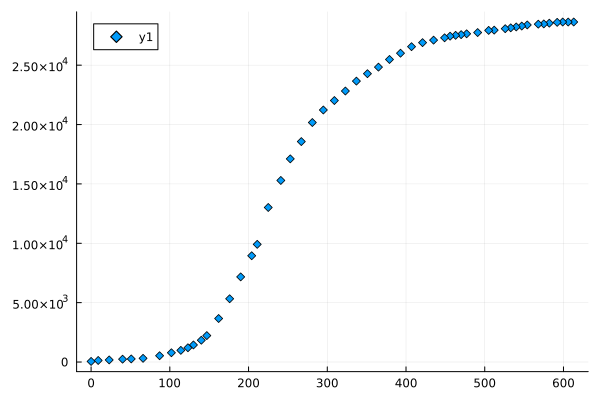

In [6]:
plot(epidays, allcases, linetype = :scatter, marker = :diamond)

We should also add a title and axis labels, and while we're at it we'll turn off the legend. For illustration, I also change the line type and line style so that a gray dotted line is plotted between the diamonds, the the grid off and  I increase the size of the diamonds.

For the long command that results, it is a good idea to use white space to break it into logical parts. Note that although visually it looks like several lines, it is just one function call and so in the sense of computer programming it is just one unit of code.

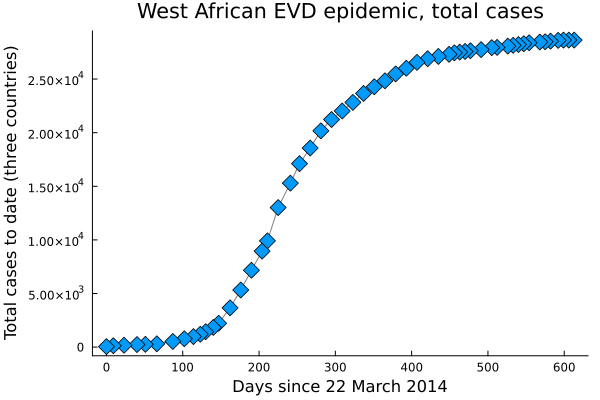

In [7]:
plot(epidays, allcases,   # here are the data to be plotted, below are the attributes
title       = "West African EVD epidemic, total cases", 
xlabel    = "Days since 22 March 2014",
ylabel    = "Total cases to date (three countries)",
marker  = (:diamond, 8),  # note the use of  parentheses to group the marker attributes into a composite of attributes 
                          # and because we plot both the path and the points, we use plot rather than scatter
line         = (:path, "gray"),   # line attributes likewise put together as one unit by the use of parantheses
legend   = false,
grid        = false)    

# A nice thing: this layout permits us add comments to individual parts of  the function call. 
# Also, notice that it helps readibility to line up vertically all the assignment "=" signs

[Back to the top](#In-this-lecture)

<h2>Save the current plot</h2>

Of course, one needs to be able to save plots from the screen in a format to be used elsewhere. For documents and presentations, pdf is a good format, while for websites .png is often preferred. 

The function to use is savefig(). Plots will follow the extension you provide for the filename. If you omit the filename, the defaults kick in and Plots will use png as the format and add .png as the file extension.

All three cases are illustrated below. After you've saved the figures, check in your folder that they are there and work as advertised!

In [8]:
savefig("WAfricanEVD_noformatspecified")             # no extension, so plot saves it as .png  
savefig("WAfricanEVD.pdf")      # Saved as a pdf
savefig("WAfricanEVD.png")     # Saved png format

"/home/mkoenig/git/julia_rr/src/notebooks/Julia_Week2/WAfricanEVD.png"

[Back to the top](#In-this-lecture)